In [1]:
import torch

a = torch.FloatTensor(2,3)
b = torch.FloatTensor([2,3,4,5])
print(a)
print(b)

tensor([[9.2756e-39, 1.0837e-38, 1.0010e-38],
        [4.6838e-39, 9.9184e-39, 9.0000e-39]])
tensor([2., 3., 4., 5.])


In [2]:
a = torch.IntTensor(2,3)
b = torch.IntTensor([2,3,4,5])
print(a)
print(b)

tensor([[0, 0, 6],
        [0, 1, 0]], dtype=torch.int32)
tensor([2, 3, 4, 5], dtype=torch.int32)


In [3]:
a = torch.rand(2,3)
print(a)

tensor([[0.8935, 0.1263, 0.0883],
        [0.4690, 0.2966, 0.2674]])


In [4]:
a = torch.randn(2,3)
print(a)

tensor([[-0.8430,  1.4647, -0.4701],
        [-0.5655, -1.2158,  1.1409]])


In [5]:
a = torch.range(1,20,2)
print(a)

tensor([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.])


d:\pyenv\ml3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


In [6]:
a = torch.zeros(2,3)
print(a)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
a = torch.randn(2,3)
b = torch.abs(a)
print(a,"\n",b)

tensor([[-0.6600, -0.0310, -0.4913],
        [ 0.9120, -0.1431,  0.0030]]) 
 tensor([[0.6600, 0.0310, 0.4913],
        [0.9120, 0.1431, 0.0030]])


In [8]:
c = torch.add(a,b)
d = torch.add(b,2)
print(c)
print(d)

tensor([[0.0000, 0.0000, 0.0000],
        [1.8240, 0.0000, 0.0059]])
tensor([[2.6600, 2.0310, 2.4913],
        [2.9120, 2.1431, 2.0030]])


In [9]:
b = torch.clamp(a, -0.1, 0.9)
print(a)
print(b)

tensor([[-0.6600, -0.0310, -0.4913],
        [ 0.9120, -0.1431,  0.0030]])
tensor([[-0.1000, -0.0310, -0.1000],
        [ 0.9000, -0.1000,  0.0030]])


In [10]:
c = torch.div(a,b)
d = torch.div(a,0.1)
print(c)
print(d)

tensor([[6.5997, 1.0000, 4.9126],
        [1.0133, 1.4309, 1.0000]])
tensor([[-6.5997, -0.3098, -4.9126],
        [ 9.1198, -1.4309,  0.0297]])


In [11]:
c = torch.mul(a,b)
d = torch.mul(a,10)
print(c)
print(d)

tensor([[6.5997e-02, 9.5952e-04, 4.9126e-02],
        [8.2078e-01, 1.4309e-02, 8.8319e-06]])
tensor([[-6.5997, -0.3098, -4.9126],
        [ 9.1198, -1.4309,  0.0297]])


In [12]:
c = torch.pow(a,2)
print(c)

tensor([[4.3556e-01, 9.5952e-04, 2.4134e-01],
        [8.3170e-01, 2.0474e-02, 8.8319e-06]])


In [14]:
b = torch.randn(3,2)
c = torch.mm(a,b)
print(c)

tensor([[ 0.3192, -0.6110],
        [-1.7371,  0.3748]])


In [15]:
b = torch.randn(3)
c = torch.mv(a,b)
print(c)

tensor([-1.6016,  0.1393])


In [2]:
# 简单神经网络实现
import torch

batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10

x = torch.randn(batch_n, input_data)
y = torch.randn(batch_n, output_data)

w1 = torch.randn(input_data, hidden_layer)
w2 = torch.randn(hidden_layer, output_data)

epoch_n = 20
learning_rate = 1e-6

for epoch in range(epoch_n):
    h1 = x.mm(w1)
    h1 = h1.clamp(min=0)
    y_pred = h1.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    print("Epoch:{}, Losss:{:.4f}".format(epoch, loss))
    
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h1.t().mm(grad_y_pred)
    
    grad_h = grad_y_pred.clone()
    grad_h = grad_h.mm(w2.t())
    grad_h.clamp_(min=0)
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate*grad_w1
    w2 -= learning_rate*grad_w2
    

Epoch:0, Losss:54269964.0000
Epoch:1, Losss:117079456.0000
Epoch:2, Losss:343475904.0000
Epoch:3, Losss:458579776.0000
Epoch:4, Losss:38813452.0000
Epoch:5, Losss:9517504.0000
Epoch:6, Losss:4303924.5000
Epoch:7, Losss:2706888.0000
Epoch:8, Losss:2093235.3750
Epoch:9, Losss:1791425.7500
Epoch:10, Losss:1601167.7500
Epoch:11, Losss:1458113.0000
Epoch:12, Losss:1339707.5000
Epoch:13, Losss:1237459.5000
Epoch:14, Losss:1147331.8750
Epoch:15, Losss:1067014.6250
Epoch:16, Losss:995011.0625
Epoch:17, Losss:930381.3125
Epoch:18, Losss:872108.5000
Epoch:19, Losss:819349.2500


In [14]:
# 使用autograd进行自动求导，计算梯度
# 使用autograd模块，需要将Tensor数据类型的变量封装成Variable对象
from torch.autograd import Variable

batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10

x = Variable(torch.randn(batch_n, input_data), requires_grad=False)
y = Variable(torch.randn(batch_n, output_data), requires_grad=False)

w1 = Variable(torch.randn(input_data, hidden_layer), requires_grad=True)
w2 = Variable(torch.randn(hidden_layer, output_data), requires_grad=True)

epoch_n = 20
learning_rate = 1e-6

for epoch in range(epoch_n):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    print("Epoch:{}, Loss:{:.4f}".format(epoch, loss.data))
    
    loss.backward()  # 计算后向传播梯度
    
    w1.data -= learning_rate*w1.grad.data
    w2.data -= learning_rate*w2.grad.data
    
    # 将各个计算节点的梯度全部置为0，防止一直在梯度累加
    w1.grad.data.zero_()
    w2.grad.data.zero_()

Epoch:0, Loss:50647364.0000
Epoch:1, Loss:132342704.0000
Epoch:2, Loss:539675712.0000
Epoch:3, Loss:752148928.0000
Epoch:4, Loss:6848063.0000
Epoch:5, Loss:4980881.5000
Epoch:6, Loss:3797918.7500
Epoch:7, Loss:2997397.2500
Epoch:8, Loss:2427927.5000
Epoch:9, Loss:2007873.0000
Epoch:10, Loss:1690388.5000
Epoch:11, Loss:1445035.0000
Epoch:12, Loss:1251823.1250
Epoch:13, Loss:1097514.7500
Epoch:14, Loss:972382.4375
Epoch:15, Loss:869659.1250
Epoch:16, Loss:784298.3750
Epoch:17, Loss:712509.0625
Epoch:18, Loss:651352.4375
Epoch:19, Loss:598828.4375


In [17]:
# 除了采用自动梯度方法，还可以继承nn.Module类重写自定义前向/后向传播函数
batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
    
    def forward(self, input, w1, w2):
        x = torch.mm(input, w1)
        x = torch.clamp(x, min=0)
        x = torch.mm(x, w2)
        return x
    
    def backward(self):
        pass
    

model = Model()
x = Variable(torch.randn(batch_n, input_data), requires_grad=False)
y = Variable(torch.randn(batch_n, output_data), requires_grad=False)

w1 = Variable(torch.randn(input_data, hidden_layer), requires_grad=True)
w2 = Variable(torch.randn(hidden_layer, output_data), requires_grad=True)

epoch_n = 20
learning_rate = 1e-6

for epoch in range(epoch_n):
    y_pred = model(x, w1, w2)
    
    loss = (y_pred - y).pow(2).sum()
    print("Epoch:{}, Loss:{:.4f}".format(epoch, loss.data))
    loss.backward()
    
    w1.data -= learning_rate*w1.grad.data
    w2.data -= learning_rate*w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

Epoch:0, Loss:58679196.0000
Epoch:1, Loss:165197968.0000
Epoch:2, Loss:680819840.0000
Epoch:3, Loss:732165120.0000
Epoch:4, Loss:1962967.6250
Epoch:5, Loss:1754400.1250
Epoch:6, Loss:1578317.7500
Epoch:7, Loss:1428108.5000
Epoch:8, Loss:1298251.7500
Epoch:9, Loss:1185585.8750
Epoch:10, Loss:1087546.3750
Epoch:11, Loss:1001894.0625
Epoch:12, Loss:926582.7500
Epoch:13, Loss:859400.7500
Epoch:14, Loss:799301.5625
Epoch:15, Loss:745113.8125
Epoch:16, Loss:696303.2500
Epoch:17, Loss:652182.8125
Epoch:18, Loss:612147.0625
Epoch:19, Loss:575765.1875


In [25]:
# 搭建模型
import torch
from torch.autograd import Variable

batch_n = 100
hidden_layer = 100
input_data = 1000
output_data = 10

x = Variable(torch.randn(batch_n, input_data), requires_grad=False)
y = Variable(torch.randn(batch_n, output_data), requires_grad=False)

models = torch.nn.Sequential(
    torch.nn.Linear(input_data, hidden_layer),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer, output_data))

epoch_n = 10000
learning_rate = 1e-4
loss_fn = torch.nn.MSELoss()

for epoch in range(epoch_n):
    y_pred = models(x)
    loss = loss_fn(y_pred, y)
    if epoch % 1000 ==0:
        print("Epoch:{}, Loss:{:.4f}".format(epoch, loss.data))
    models.zero_grad()
    
    loss.backward()
    
    for param in models.parameters():
        param.data -= param.grad.data*learning_rate


Epoch:0, Loss:1.1006
Epoch:1000, Loss:1.0175
Epoch:2000, Loss:0.9456
Epoch:3000, Loss:0.8823
Epoch:4000, Loss:0.8260
Epoch:5000, Loss:0.7752
Epoch:6000, Loss:0.7284
Epoch:7000, Loss:0.6848
Epoch:8000, Loss:0.6440
Epoch:9000, Loss:0.6055


In [41]:
# 使用optim类中的参数优化方法
models = torch.nn.Sequential(
    torch.nn.Linear(input_data, hidden_layer),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer, output_data))

optimzer = torch.optim.Adam(models.parameters(), lr=learning_rate)

for epoch in range(20):
    y_pred = models(x)
    loss = loss_fn(y_pred, y)
    print("Epoch:{}, Loss:{:.4f}".format(epoch, loss.data))
    optimzer.zero_grad()
    
    loss.backward()
    
    # 更新参数
    optimzer.step()

Epoch:0, Loss:1.1178
Epoch:1, Loss:1.0958
Epoch:2, Loss:1.0742
Epoch:3, Loss:1.0531
Epoch:4, Loss:1.0325
Epoch:5, Loss:1.0125
Epoch:6, Loss:0.9930
Epoch:7, Loss:0.9740
Epoch:8, Loss:0.9554
Epoch:9, Loss:0.9374
Epoch:10, Loss:0.9197
Epoch:11, Loss:0.9026
Epoch:12, Loss:0.8858
Epoch:13, Loss:0.8694
Epoch:14, Loss:0.8534
Epoch:15, Loss:0.8377
Epoch:16, Loss:0.8224
Epoch:17, Loss:0.8074
Epoch:18, Loss:0.7927
Epoch:19, Loss:0.7783


In [1]:
# 手写数字识别
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable

# 定义数据变换类型
transform = transforms.Compose([transforms.ToTensor(),
            transforms.Normalize(mean=[0.5],std=[0.5])])
#下载、载入数据，并进行数据变换
data_train = datasets.MNIST(root="./data",
                           transform=transform,
                           train=True,
                           download=True)
date_test = datasets.MNIST(root="./data",
                          transform=transform,
                          train=False)
# 对数据进行装载、分割
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                               batch_size=64,
                                               shuffle=True)
data_loader_test = torch.utils.data.DataLoader(dataset=date_test,
                                              batch_size=64,
                                              shuffle=True)


[tensor(8), tensor(6), tensor(8), tensor(4), tensor(2), tensor(9), tensor(8), tensor(8), tensor(1), tensor(5), tensor(7), tensor(3), tensor(7), tensor(6), tensor(8), tensor(4), tensor(8), tensor(5), tensor(2), tensor(5), tensor(9), tensor(5), tensor(7), tensor(0), tensor(4), tensor(1), tensor(9), tensor(4), tensor(1), tensor(3), tensor(8), tensor(4), tensor(0), tensor(6), tensor(5), tensor(8), tensor(9), tensor(2), tensor(1), tensor(8), tensor(9), tensor(4), tensor(6), tensor(5), tensor(0), tensor(2), tensor(7), tensor(5), tensor(3), tensor(6), tensor(9), tensor(3), tensor(4), tensor(7), tensor(4), tensor(4), tensor(9), tensor(9), tensor(2), tensor(6), tensor(2), tensor(7), tensor(5), tensor(6)]


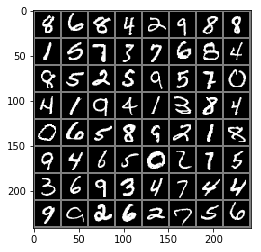

In [2]:
# 预览数据分割后的一批数据
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision

images, labels = next(iter(data_loader_train))
# 将同一批次的图片构造成网格模式
img = torchvision.utils.make_grid(images)
# transpose 为交换数据维度 由（channel,height,weight）=>(height,weight,channel)
img = img.numpy().transpose(1,2,0)
# 图像为三通道，std为每个通道的方差
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [3]:
# 实现卷积神经网络
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.convl=torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(stride=2, kernel_size=2))
        
        self.dense=torch.nn.Sequential(
            torch.nn.Linear(14*14*128, 1024),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(1024, 10))
    
    def forward(self, x):
        x = self.convl(x)
        x = x.view(-1, 14*14*128)
        x = self.dense(x)
        return x

In [4]:
model = Model()
# 损失函数使用交叉熵
cost = torch.nn.CrossEntropyLoss()
# 参数优化采用Adam自适应算法，学习率默认
optimizer = torch.optim.Adam(model.parameters())

In [5]:
model

Model(
  (convl): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [6]:
# 进行模型训练
n_epochs = 5

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    print("Epoch{}/{}".format(epoch, n_epochs))
    print("-"*10)
    for data in data_loader_train:
        X_train, y_train = data
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train)
        _, pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = cost(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.data
        running_correct += torch.sum(pred == y_train.data)
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is:{:.4f}, Train Accuracy is:{:.4f}%, Test Accuracy "\
          "is:{:.4f}%".format(torch.true_divide(running_loss, len(data_train)),
                    torch.true_divide(100*running_correct, len(data_train)),
                    torch.true_divide(100*testing_correct, len(date_test))))

Epoch0/5
----------
Loss is:0.0020, Train Accuracy is:96.0650%, Test Accuracy is:97.9300%
Epoch1/5
----------
Loss is:0.0007, Train Accuracy is:98.5750%, Test Accuracy is:98.3000%
Epoch2/5
----------
Loss is:0.0005, Train Accuracy is:99.0783%, Test Accuracy is:98.5200%
Epoch3/5
----------
Loss is:0.0003, Train Accuracy is:99.3000%, Test Accuracy is:98.7700%
Epoch4/5
----------
Loss is:0.0003, Train Accuracy is:99.4450%, Test Accuracy is:98.5300%


Predict Label is: [tensor(8), tensor(3), tensor(5), tensor(0), tensor(5), tensor(7)]
Real Label is: [tensor(8), tensor(3), tensor(5), tensor(0), tensor(5), tensor(7)]


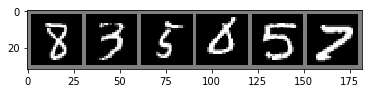

In [9]:
# 随机抽取部分测试集数据，查看结果
data_loader_test = torch.utils.data.DataLoader(dataset=date_test,
                                              batch_size=6,
                                              shuffle=True)
X_test, y_test = next(iter(data_loader_test))
inputs = Variable(X_test)
pred = model(inputs)
_, pred = torch.max(pred, 1)

print("Predict Label is:", [i for i in pred.data])
print("Real Label is:", [i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose(1,2,0)

std = [0.5, 0.5, 0.5]
mean = [0.5, 0.5, 0.5]
img = img*std+mean
plt.imshow(img)